John Victor Kanaparthy

In [1]:
#Calling relevant libraries
from urllib.request import urlopen
from selenium import webdriver
from bs4 import BeautifulSoup
from newspaper import Article
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [2]:
#Calling the url from theguardian
url = "https://www.theguardian.com/commentisfree/2021/oct/28/economy-recovering-covid-brexit-eu"

In [3]:
#Setting up the data retrieval
brexit_guardian = Article(url, language="en") 

In [4]:
#Downloading the article 
brexit_guardian.download() 
  
#Parsing the article 
brexit_guardian.parse() 
  
#Performing natural language processing
brexit_guardian.nlp()

In [5]:
#Getting the title of the article
print("Article's Title:") 
print(brexit_guardian.title) 
 

Article's Title:
Now it's official: Brexit will damage the economy long into the future | Jonathan Portes


In [6]:
#Getting the content of the article from The Guardian
print("Article's Text:") 
print(brexit_guardian.text) 
print("n") 

Article's Text:
We’re used to hearing apocalyptic descriptions of the impact of the Covid-19 pandemic on the UK economy: “the largest fall in economic output since 1709”, was the Office for National Statistics’ verdict eight months ago.

Yet the Office for Budget Responsibility, in its report on Wednesday’s budget, estimates that the long-term impact of Brexit will be more than twice as great as Covid. It thinks that Brexit will reduce UK productivity, and hence GDP per capita, by 4%, while the impact of Covid on GDP will only be 2%, with a slightly smaller impact on GDP per capita.

This shouldn’t be surprising. The fall in output in 2020 was both inevitable and desirable – it was not, in economic terms, that different from an extended holiday. Just like a holiday, we chose to shut down large parts of the economy. The difference was that it was by necessity – to save lives – rather than by choice, but the consequences aren’t that different. The economy shrank, and by a lot.

Holidays 

In [7]:
#Checking for the keywords in the article
print("Article's Keywords:") 
print(brexit_guardian.keywords)

Article's Keywords:
['future', 'long', 'portes', 'covid', 'brexit', 'impact', 'obr', 'official', 'reduce', 'trade', 'gdp', 'damage', 'jonathan', 'economy', 'economic', 'uk']


In [8]:
#Creating a text file to paste the guardian data
guardian_data = open("Brexit_TheGuardian.txt","w")

In [9]:
# Writing the data into the text file
guardian_data.writelines(brexit_guardian.text) 
guardian_data.close() 

In [10]:
#Creating a variable to contain the text file data
textfile = open('Brexit_TheGuardian.txt', mode='r')
allwords = textfile.read()
print(allwords)

We’re used to hearing apocalyptic descriptions of the impact of the Covid-19 pandemic on the UK economy: “the largest fall in economic output since 1709”, was the Office for National Statistics’ verdict eight months ago.

Yet the Office for Budget Responsibility, in its report on Wednesday’s budget, estimates that the long-term impact of Brexit will be more than twice as great as Covid. It thinks that Brexit will reduce UK productivity, and hence GDP per capita, by 4%, while the impact of Covid on GDP will only be 2%, with a slightly smaller impact on GDP per capita.

This shouldn’t be surprising. The fall in output in 2020 was both inevitable and desirable – it was not, in economic terms, that different from an extended holiday. Just like a holiday, we chose to shut down large parts of the economy. The difference was that it was by necessity – to save lives – rather than by choice, but the consequences aren’t that different. The economy shrank, and by a lot.

Holidays don’t reduce the

In [11]:
#Extracting the words and convert them to lower case
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(allwords.lower())
print(tokens)

['we', 're', 'used', 'to', 'hearing', 'apocalyptic', 'descriptions', 'of', 'the', 'impact', 'of', 'the', 'covid', '19', 'pandemic', 'on', 'the', 'uk', 'economy', 'the', 'largest', 'fall', 'in', 'economic', 'output', 'since', '1709', 'was', 'the', 'office', 'for', 'national', 'statistics', 'verdict', 'eight', 'months', 'ago', 'yet', 'the', 'office', 'for', 'budget', 'responsibility', 'in', 'its', 'report', 'on', 'wednesday', 's', 'budget', 'estimates', 'that', 'the', 'long', 'term', 'impact', 'of', 'brexit', 'will', 'be', 'more', 'than', 'twice', 'as', 'great', 'as', 'covid', 'it', 'thinks', 'that', 'brexit', 'will', 'reduce', 'uk', 'productivity', 'and', 'hence', 'gdp', 'per', 'capita', 'by', '4', 'while', 'the', 'impact', 'of', 'covid', 'on', 'gdp', 'will', 'only', 'be', '2', 'with', 'a', 'slightly', 'smaller', 'impact', 'on', 'gdp', 'per', 'capita', 'this', 'shouldn', 't', 'be', 'surprising', 'the', 'fall', 'in', 'output', 'in', '2020', 'was', 'both', 'inevitable', 'and', 'desirable'

In [12]:
#Extracting the data and displaying some sentences and phrases
sentences = nltk.sent_tokenize(allwords)
sentences[0]
sentences[-1]

'But so far, it looks as if, from an economic perspective, Covid is for Christmas, while Brexit is for life.'

In [13]:
#Recreating the token list without stopwords
tokens = [token for token in tokens if token not in stopwords.words('english')]
print(tokens)

['used', 'hearing', 'apocalyptic', 'descriptions', 'impact', 'covid', '19', 'pandemic', 'uk', 'economy', 'largest', 'fall', 'economic', 'output', 'since', '1709', 'office', 'national', 'statistics', 'verdict', 'eight', 'months', 'ago', 'yet', 'office', 'budget', 'responsibility', 'report', 'wednesday', 'budget', 'estimates', 'long', 'term', 'impact', 'brexit', 'twice', 'great', 'covid', 'thinks', 'brexit', 'reduce', 'uk', 'productivity', 'hence', 'gdp', 'per', 'capita', '4', 'impact', 'covid', 'gdp', '2', 'slightly', 'smaller', 'impact', 'gdp', 'per', 'capita', 'surprising', 'fall', 'output', '2020', 'inevitable', 'desirable', 'economic', 'terms', 'different', 'extended', 'holiday', 'like', 'holiday', 'chose', 'shut', 'large', 'parts', 'economy', 'difference', 'necessity', 'save', 'lives', 'rather', 'choice', 'consequences', 'different', 'economy', 'shrank', 'lot', 'holidays', 'reduce', 'productive', 'capacity', 'economy', 'factory', 'shuts', 'month', 'machines', 'still', 'reopens', 's

In [14]:
#Displaying the word frequncies
freq_dist = nltk.FreqDist(tokens)
freq_dist

FreqDist({'uk': 10, 'economic': 9, 'brexit': 9, 'trade': 8, 'impact': 7, 'covid': 6, 'economy': 6, 'obr': 6, 'reduce': 5, 'gdp': 5, ...})

<FreqDist with 304 samples and 440 outcomes>
[('uk', 10), ('economic', 9), ('brexit', 9), ('trade', 8), ('impact', 7), ('covid', 6), ('economy', 6), ('obr', 6), ('reduce', 5), ('gdp', 5), ('still', 5), ('fall', 4), ('long', 4), ('term', 4), ('far', 4), ('could', 4), ('pandemic', 3), ('estimates', 3), ('different', 3), ('would', 3), ('damage', 3), ('indeed', 3), ('pre', 3), ('economies', 3), ('labour', 3)]


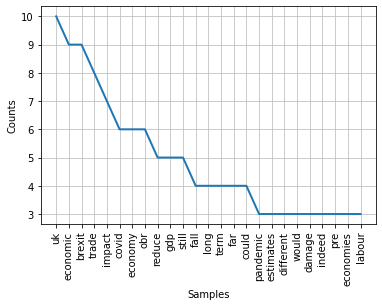

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
#Plotting a graph for the most frequest words
print(freq_dist)
print(freq_dist.most_common(25))
freq_dist.plot(25)

In [16]:
#Calling the url from Reuters
url2 = "https://www.reuters.com/world/the-great-reboot/brexit-cold-turkey-uk-tries-kick-25-year-imported-labour-habit-2021-10-05/"

In [17]:
#Setting up the data retrieval
brexit_reuters = Article(url2, language="en") 

In [18]:
#Downloading the article 
brexit_reuters.download() 
  
#Parsing the article 
brexit_reuters.parse() 
  
#Performing natural language processing
brexit_reuters.nlp()

In [19]:
#Getting the title of the article
print("Article's Title:") 
print(brexit_reuters.title) 

Article's Title:
Analysis: Brexit cold turkey - UK tries to kick 25-year imported labour habit


In [20]:
#Getting the content of the article from Reuters
print("Article's Text:") 
print(brexit_reuters.text) 
print("n") 

Article's Text:
A sign informing customers that fuel has run out is pictured at a Esso fuel station in London, Britain, October 4, 2021. REUTERS/Hannah McKay/File Photo

LONDON, Oct 5 (Reuters) - The United Kingdom's 25-year-old model of importing cheap labour has been up-ended by Brexit and COVID-19, sowing the seeds for a 1970s-style winter of discontent complete with worker shortages, spiralling wage demands and price rises.

Leaving the European Union, followed by the chaos of the biggest public health crisis in a century, has plunged the world's fifth-largest economy into a sudden attempt to kick its addiction to cheap imported labour.

Prime Minister Boris Johnson's Brexit experiment - unique among major economies - has further strained supply chains already creaking globally for everything from pork and poultry to medicines and milk.

Wages, and thus prices, will have to rise. read more

The longer-term impact on growth, Johnson's political fortunes and the United Kingdom's on-o

In [21]:
#Checking for the keywords in the article
print("Article's Keywords:") 
print(brexit_reuters.keywords)

Article's Keywords:
['habit', 'imported', 'united', 'country', 'workers', 'wage', 'european', 'eu', 'brexit', 'turkey', 'tries', 'kick', 'johnson', 'cold', 'labour', 'wages', 'prices', 'analysis', 'uk']


In [22]:
#Creating a text file to paste the guardian data
covid_data2 = open("Brexit_Reuters.txt","w")

In [23]:
# Writing the data into the text file
covid_data2.writelines(brexit_reuters.text) 
covid_data2.close() 

In [24]:
#Creating a variable to contain the text file data
textfile2 = open('Brexit_Reuters.txt', mode='r')
allwords2 = textfile2.read()
print(allwords2)

A sign informing customers that fuel has run out is pictured at a Esso fuel station in London, Britain, October 4, 2021. REUTERS/Hannah McKay/File Photo

LONDON, Oct 5 (Reuters) - The United Kingdom's 25-year-old model of importing cheap labour has been up-ended by Brexit and COVID-19, sowing the seeds for a 1970s-style winter of discontent complete with worker shortages, spiralling wage demands and price rises.

Leaving the European Union, followed by the chaos of the biggest public health crisis in a century, has plunged the world's fifth-largest economy into a sudden attempt to kick its addiction to cheap imported labour.

Prime Minister Boris Johnson's Brexit experiment - unique among major economies - has further strained supply chains already creaking globally for everything from pork and poultry to medicines and milk.

Wages, and thus prices, will have to rise. read more

The longer-term impact on growth, Johnson's political fortunes and the United Kingdom's on-off relationship 

In [25]:
#Extracting the words and convert them to lower case
tokenizer2 = RegexpTokenizer(r'\w+')
tokens2 = tokenizer2.tokenize(allwords2.lower())
print(tokens2)

['a', 'sign', 'informing', 'customers', 'that', 'fuel', 'has', 'run', 'out', 'is', 'pictured', 'at', 'a', 'esso', 'fuel', 'station', 'in', 'london', 'britain', 'october', '4', '2021', 'reuters', 'hannah', 'mckay', 'file', 'photo', 'london', 'oct', '5', 'reuters', 'the', 'united', 'kingdom', 's', '25', 'year', 'old', 'model', 'of', 'importing', 'cheap', 'labour', 'has', 'been', 'up', 'ended', 'by', 'brexit', 'and', 'covid', '19', 'sowing', 'the', 'seeds', 'for', 'a', '1970s', 'style', 'winter', 'of', 'discontent', 'complete', 'with', 'worker', 'shortages', 'spiralling', 'wage', 'demands', 'and', 'price', 'rises', 'leaving', 'the', 'european', 'union', 'followed', 'by', 'the', 'chaos', 'of', 'the', 'biggest', 'public', 'health', 'crisis', 'in', 'a', 'century', 'has', 'plunged', 'the', 'world', 's', 'fifth', 'largest', 'economy', 'into', 'a', 'sudden', 'attempt', 'to', 'kick', 'its', 'addiction', 'to', 'cheap', 'imported', 'labour', 'prime', 'minister', 'boris', 'johnson', 's', 'brexit', 

In [26]:
#Extracting the data and displaying some sentences and phrases
sentences2 = nltk.sent_tokenize(allwords2)
sentences2[0]
sentences2[-1]

'Reporting by Guy Faulconbridge; Editing by Catherine Evans and Andrew Heavens\n\nOur Standards: The Thomson Reuters Trust Principles.'

In [27]:
#Recreating the token list without stopwords
tokens2 = [token for token in tokens2 if token not in stopwords.words('english')]
print(tokens2)

['sign', 'informing', 'customers', 'fuel', 'run', 'pictured', 'esso', 'fuel', 'station', 'london', 'britain', 'october', '4', '2021', 'reuters', 'hannah', 'mckay', 'file', 'photo', 'london', 'oct', '5', 'reuters', 'united', 'kingdom', '25', 'year', 'old', 'model', 'importing', 'cheap', 'labour', 'ended', 'brexit', 'covid', '19', 'sowing', 'seeds', '1970s', 'style', 'winter', 'discontent', 'complete', 'worker', 'shortages', 'spiralling', 'wage', 'demands', 'price', 'rises', 'leaving', 'european', 'union', 'followed', 'chaos', 'biggest', 'public', 'health', 'crisis', 'century', 'plunged', 'world', 'fifth', 'largest', 'economy', 'sudden', 'attempt', 'kick', 'addiction', 'cheap', 'imported', 'labour', 'prime', 'minister', 'boris', 'johnson', 'brexit', 'experiment', 'unique', 'among', 'major', 'economies', 'strained', 'supply', 'chains', 'already', 'creaking', 'globally', 'everything', 'pork', 'poultry', 'medicines', 'milk', 'wages', 'thus', 'prices', 'rise', 'read', 'longer', 'term', 'impa

In [28]:
#Displaying the word frequncies
freq_dist2 = nltk.FreqDist(tokens2)
freq_dist2

FreqDist({'brexit': 10, 'johnson': 10, 'wages': 10, 'european': 7, 'said': 7, 'workers': 5, 'britain': 4, 'united': 4, 'kingdom': 4, 'labour': 4, ...})

<FreqDist with 392 samples and 548 outcomes>
[('brexit', 10), ('johnson', 10), ('wages', 10), ('european', 7), ('said', 7), ('workers', 5), ('britain', 4), ('united', 4), ('kingdom', 4), ('labour', 4), ('wage', 4), ('prices', 4), ('go', 4), ('immigration', 4), ('country', 4), ('eu', 4), ('000', 4), ('fuel', 3), ('reuters', 3), ('winter', 3), ('discontent', 3), ('shortages', 3), ('union', 3), ('everything', 3), ('rise', 3)]


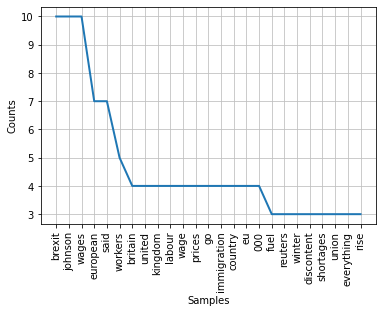

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [29]:
#Plotting a graph for the most frequest words
print(freq_dist2)
print(freq_dist2.most_common(25))
freq_dist2.plot(25)

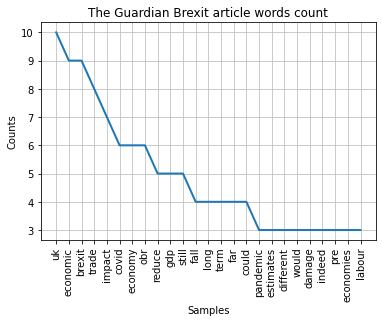

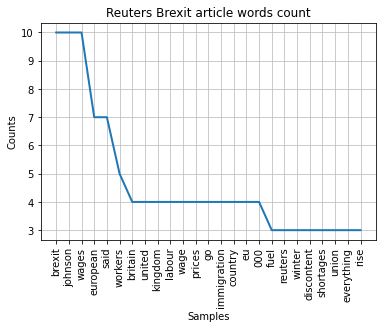

<AxesSubplot:title={'center':'Reuters Brexit article words count'}, xlabel='Samples', ylabel='Counts'>

In [30]:
#Plotting the word count graphs for The Guardian and Reuters together to compare

from matplotlib import pyplot as plt
%matplotlib inline

plt.title("The Guardian Brexit article words count")
freq_dist.plot(25)

plt.title("Reuters Brexit article words count")
freq_dist2.plot(25)

In [34]:
#Import pandas library
import pandas as pd

#Creating a dataframe to store words and word counts of first article
article1=pd.DataFrame(freq_dist.keys())
article1.rename(columns={0: 'Words'}, inplace=True)
article1['word_count']=pd.DataFrame(freq_dist.values())
article1.sort_values('word_count',axis=0,ascending=False)

,Words,word_count
8,uk,10
31,brexit,9
12,economic,9
199,trade,8
4,impact,7
...,...,...
128,us,1
129,boosted,1
130,joe,1
131,biden,1


In [35]:
#Creating a dataframe to store words and word counts of second article
article2=pd.DataFrame(freq_dist2.keys())
article2.rename(columns={0: 'Words'}, inplace=True)
article2['word_count']=pd.DataFrame(freq_dist2.values())
article2.sort_values('word_count',axis=0,ascending=False)

,Words,word_count
30,brexit,10
70,johnson,10
87,wages,10
48,european,7
111,said,7
...,...,...
163,machine,1
162,destroying,1
159,protect,1
158,promised,1
